## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score


In [15]:
data = pd.read_csv('german.csv', sep=';')
print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

print(f"\nРаспределение классов: {np.bincount(y)}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Первые 5 строк данных:
   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                      

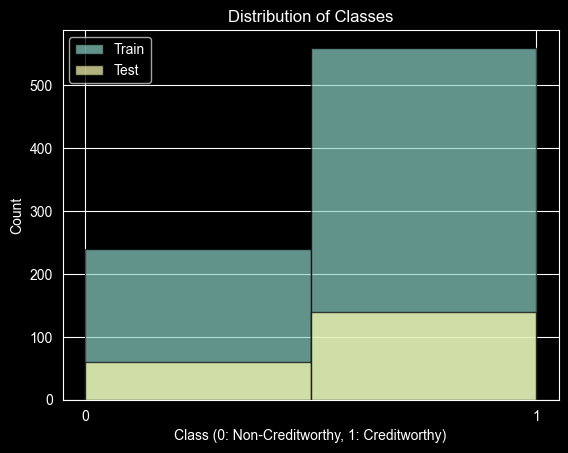

In [16]:
plt.hist(y_train, bins=2, edgecolor='k', alpha=0.7)
plt.hist(y_test, bins=2, edgecolor='k', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.legend(['Train', 'Test'])
plt.show()

In [17]:
best_params = {}

from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_params['logistic'] = grid_search_lr.best_params_
print(f"Лучшие параметры для логистической регрессии: {grid_search_lr.best_params_}")

param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_params['decision_tree'] = grid_search_dt.best_params_
print(f"Лучшие параметры для дерева решений: {grid_search_dt.best_params_}")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  #
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_params['knn'] = grid_search_knn.best_params_
print(f"Лучшие параметры для KNN: {grid_search_knn.best_params_}")

logistic_regression_model = LogisticRegression(**best_params['logistic'], max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier(**best_params['decision_tree'], random_state=42)
decision_tree_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(**best_params['knn'])
knn_model.fit(X_train, y_train)

C:\Users\asatulin_v\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Лучшие параметры для логистической регрессии: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Лучшие параметры для дерева решений: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Лучшие параметры для KNN: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


C:\Users\asatulin_v\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",20
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None



Результаты моделей:
             Модель  Accuracy  ROC-AUC  Precision   Recall
Logistic Regression      0.78 0.825000   0.815789 0.885714
      Decision Tree      0.68 0.664702   0.796875 0.728571
K-Nearest Neighbors      0.77 0.772024   0.767045 0.964286

Оценка по ROC-AUC:
Logistic Regression: ROC-AUC = 0.8250 -> 10 баллов
Decision Tree: ROC-AUC = 0.6647 -> 0 баллов
K-Nearest Neighbors: ROC-AUC = 0.7720 -> 6 баллов


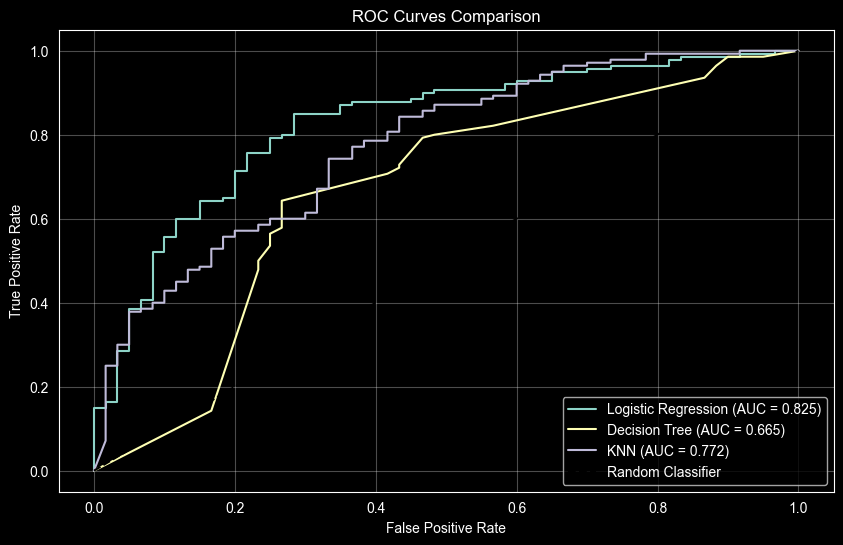

In [18]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)


def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    return {
        'Модель': model_name,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'Precision': precision,
        'Recall': recall
    }


results = []
results.append(evaluate_model(y_test, y_pred_logistic, y_prob_logistic, 'Logistic Regression'))
results.append(evaluate_model(y_test, y_pred_decision_tree, y_prob_decision_tree, 'Decision Tree'))
results.append(evaluate_model(y_test, y_pred_knn, y_prob_knn, 'K-Nearest Neighbors'))

roc_auc_logistic = results[0]['ROC-AUC']
roc_auc_decision_tree = results[1]['ROC-AUC']
roc_auc_knn = results[2]['ROC-AUC']

results_df = pd.DataFrame(results)
print("\nРезультаты моделей:")
print(results_df.to_string(index=False))


def get_score(auc):
    if auc <= 0.75:
        return 0
    elif auc <= 0.76:
        return 2
    elif auc <= 0.77:
        return 4
    elif auc <= 0.78:
        return 6
    elif auc <= 0.79:
        return 8
    else:
        return 10


print("\nОценка по ROC-AUC:")
for result in results:
    score = get_score(result['ROC-AUC'])
    print(f"{result['Модель']}: ROC-AUC = {result['ROC-AUC']:.4f} -> {score} баллов")

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_logistic)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_logistic:.3f})')

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_decision_tree)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.3f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели